In [1]:
library(tidyverse)
options(repr.plot.width = 10 , repr.plot.height = 6, repr.plot.res = 150,
        jupyter.plot_mimetypes = "image/png") 
theme_set(theme_classic())

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# STATS 504
## Week 2
![babies](https://images.ctfassets.net/cnu0m8re1exe/PYLeBWr2QDF5yjyZwB5Iq/7509e49d1d621860c1d4c484243c23db/shutterstock_189429203.jpg)

The US Social Security Administration keeps records of every child born in the United States each year. These records are available in aggregate form in a [public database](https://www.ssa.gov/oact/babynames/).

We are interested in understanding more about baby names 

In [2]:
#install.packages("babynames")
library(babynames)
babynames %>% filter(year < 1890, name == "Mary", sex == "F") %>% summarize(s = sum(n))

s
<int>
91668


In [3]:
babynames <- read_csv("babynames.csv.gz")

Rows: 1924665 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): sex, name
dbl (3): year, n, prop

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


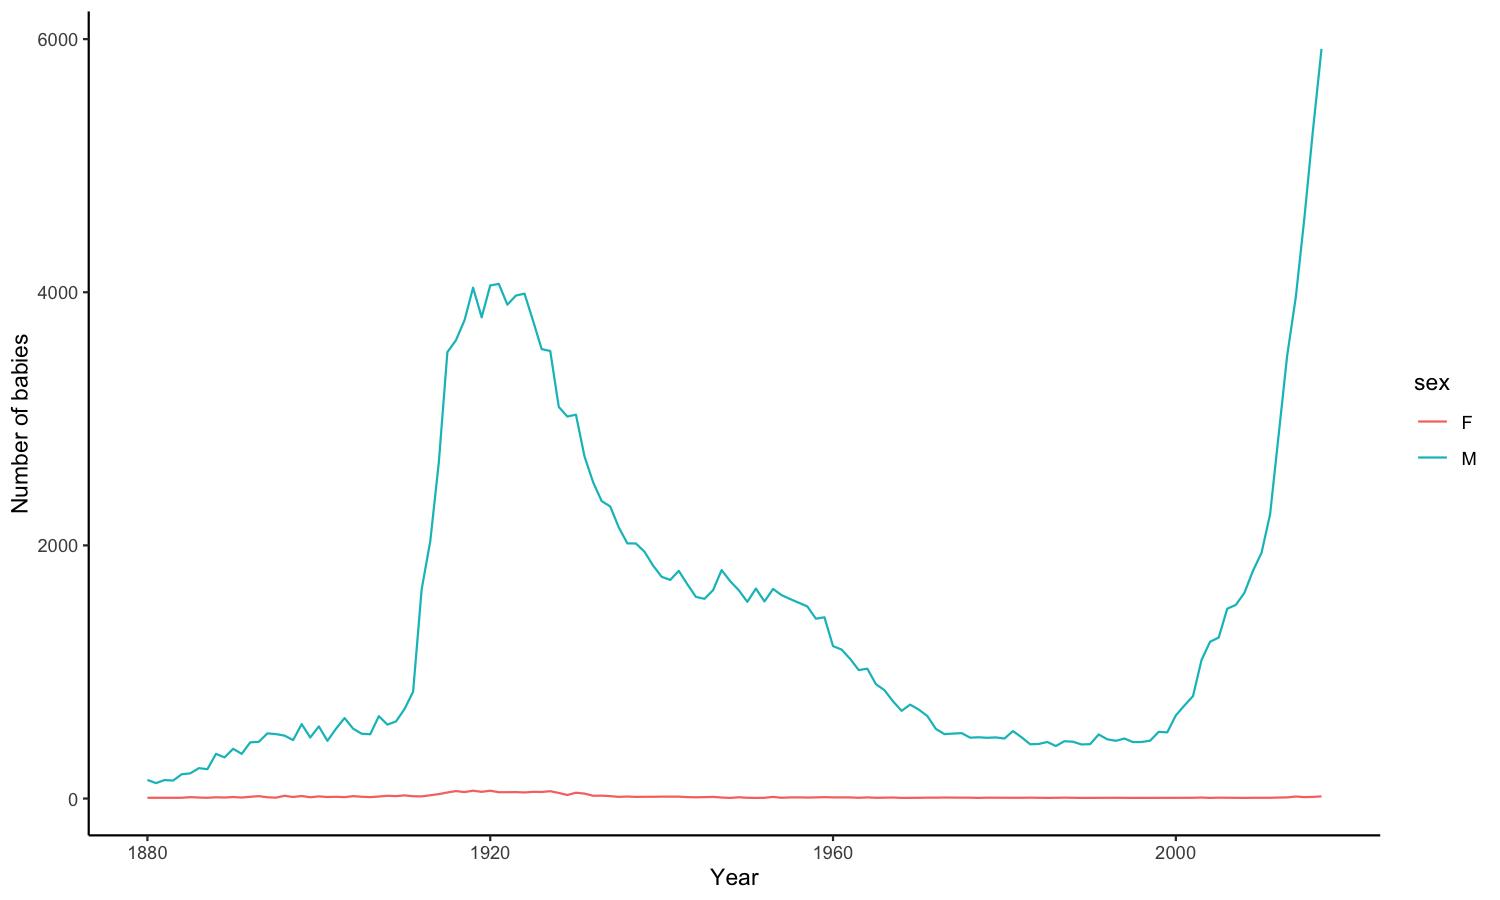

In [4]:
# number of Leo
babynames %>% filter(name == "Leo") %>% ggplot() +
     geom_line(aes(x = year, y = n, color = sex)) + 
    xlab("Year") + ylab("Number of babies")

<img src="https://beam-images.warnermediacdn.com/BEAM_LWM_DELIVERABLES/52dae4c7-2ab1-4bb9-ab1c-8100fd54e2f9/525e19cadd275c68e933773cc3bdad91a12fe10e.jpg?submitted=1684658977805&host=wbd-images.prod-vod.h264.io&partner=beamcom">

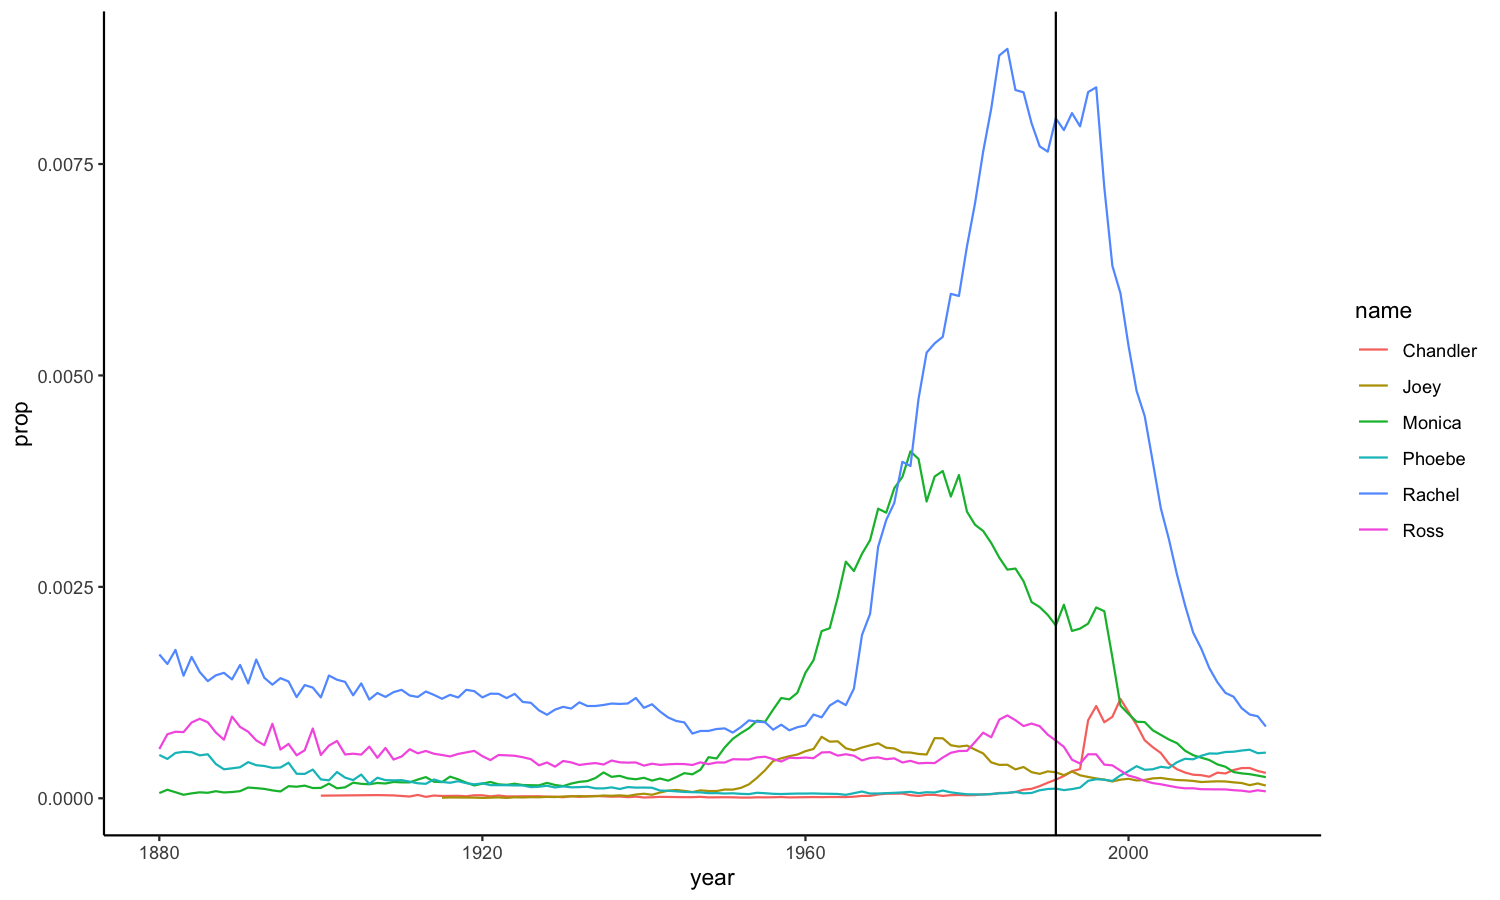

In [5]:
male.friends <- c("Chandler", "Joey", "Ross")
female.friends <- c("Monica", "Phoebe", "Rachel")

# number of friends

babynames %>% filter(
    (name %in% male.friends & sex == "M") |
    (name %in% female.friends & sex == "F")
) %>% ggplot + geom_line(aes(x = year, y = prop, color = name)) +
    geom_vline(xintercept = 1991)

#This is when Friends was in development, and shortly before it premiered in 1994
#Possibly used to analyze name trends before vs. after the show became a cultural phenomenon


## Eternal names
The most common name each year is:

In [6]:
# most common name by year top 30
babynames %>% group_by(year, sex) %>% mutate(r = rank(-n)) %>% filter(r <= 30) %>% group_by(name, sex) %>% count %>% 
    arrange(-n)

name,sex,n
<chr>,<chr>,<int>
Elizabeth,F,138
James,M,138
John,M,138
Joseph,M,138
William,M,138
David,M,128
Robert,M,122
Thomas,M,117
Richard,M,106


We see that Mary and John were extremely popular names in the late 19th century.

## &#129300; Quiz

Call a name *eternal* if it is among the most 30 common names for its gender in *every* year of data. 

John is eternal, but Mary is not. Including John there are four eternal boy names, and one eternal girl name. 

What is the eternal girl's name?

<ol style="list-style-type: upper-alpha;">
    <li>Anna</li>
    <li>Elizabeth</li>
    <li>Khloe</li>
    <li>Spike</li>
    <li>Margaret</li>
</ol>

## Naming trends driven by migration
What fraction of male names ended in "o", or female names in "a", over time?

In [18]:
stringr::str_sub('km', -1)

[1] "m"

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


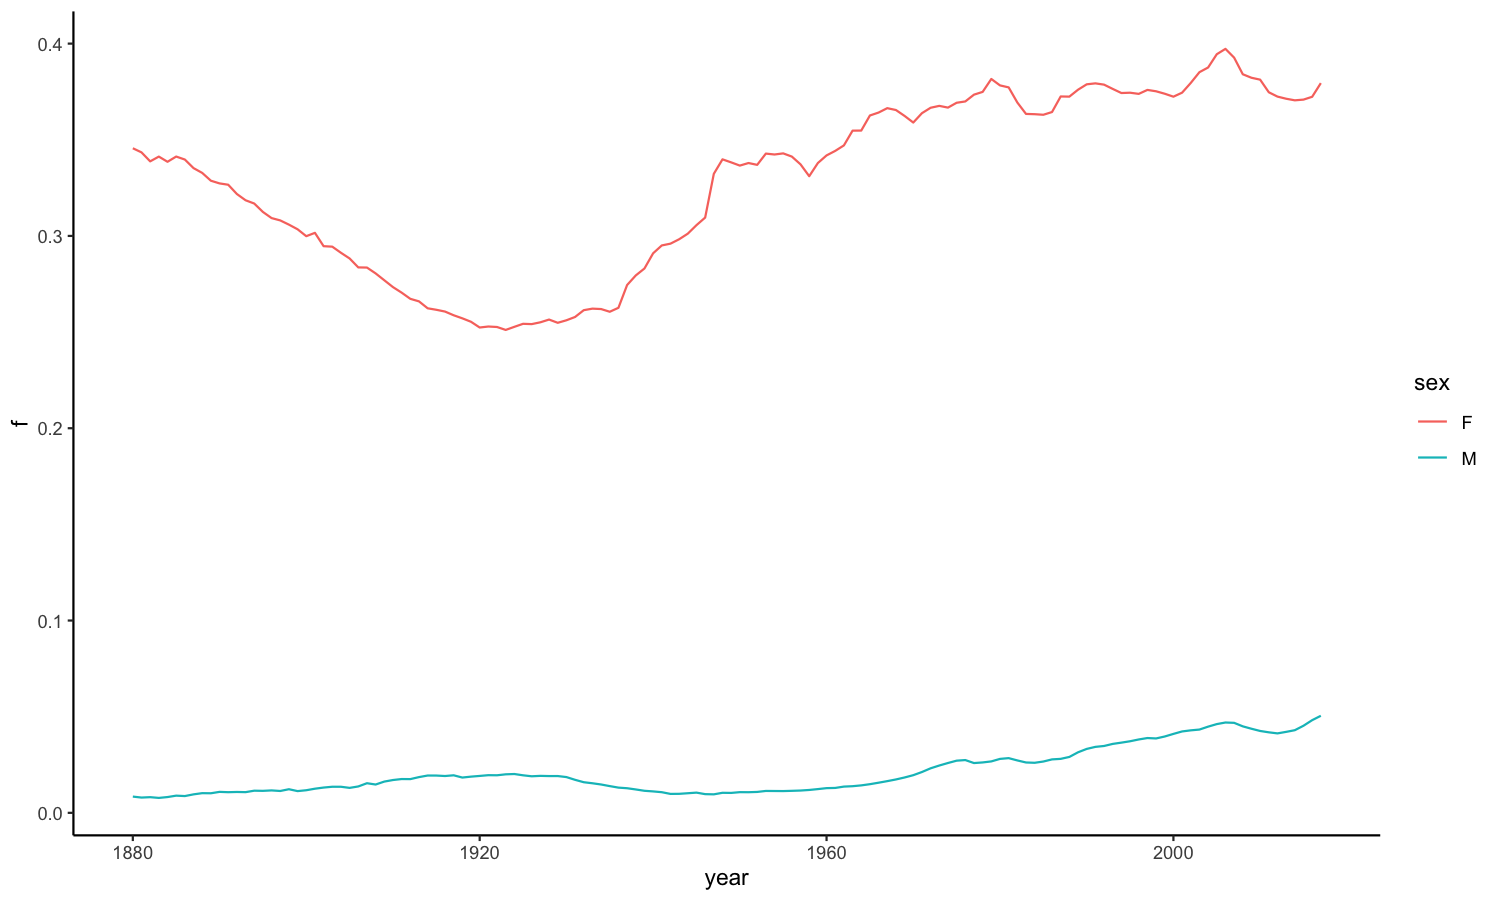

In [7]:
# What fraction of male names ended in o, or female names in a, over time?

babynames %>% mutate(last_chr_vowel = 
                     ((str_sub(name, -1) == "o") & sex == "M") |
                     ((str_sub(name, -1) == "a" & sex == "F"))
                     ) %>% 
    group_by(year, sex) %>% summarize(f = weighted.mean(last_chr_vowel, w=n)) %>% 
    ggplot + geom_line(aes(x = year, y = f, color = sex))

## First letter
Does the first letter of a name show evidence of trends in popularity over time?

In [7]:
babymod <- babynames %>%
  mutate(first_letter = str_sub(name, 1, 1))

letter_trends <- babymod %>%
  group_by(year) %>%
  mutate(year_total = sum(n)) %>%
  ungroup() %>%
  group_by(year, first_letter) %>%
  summarize(total = sum(n), year_total = unique(year_total), .groups = "drop") %>%
  mutate(prop = total / year_total)




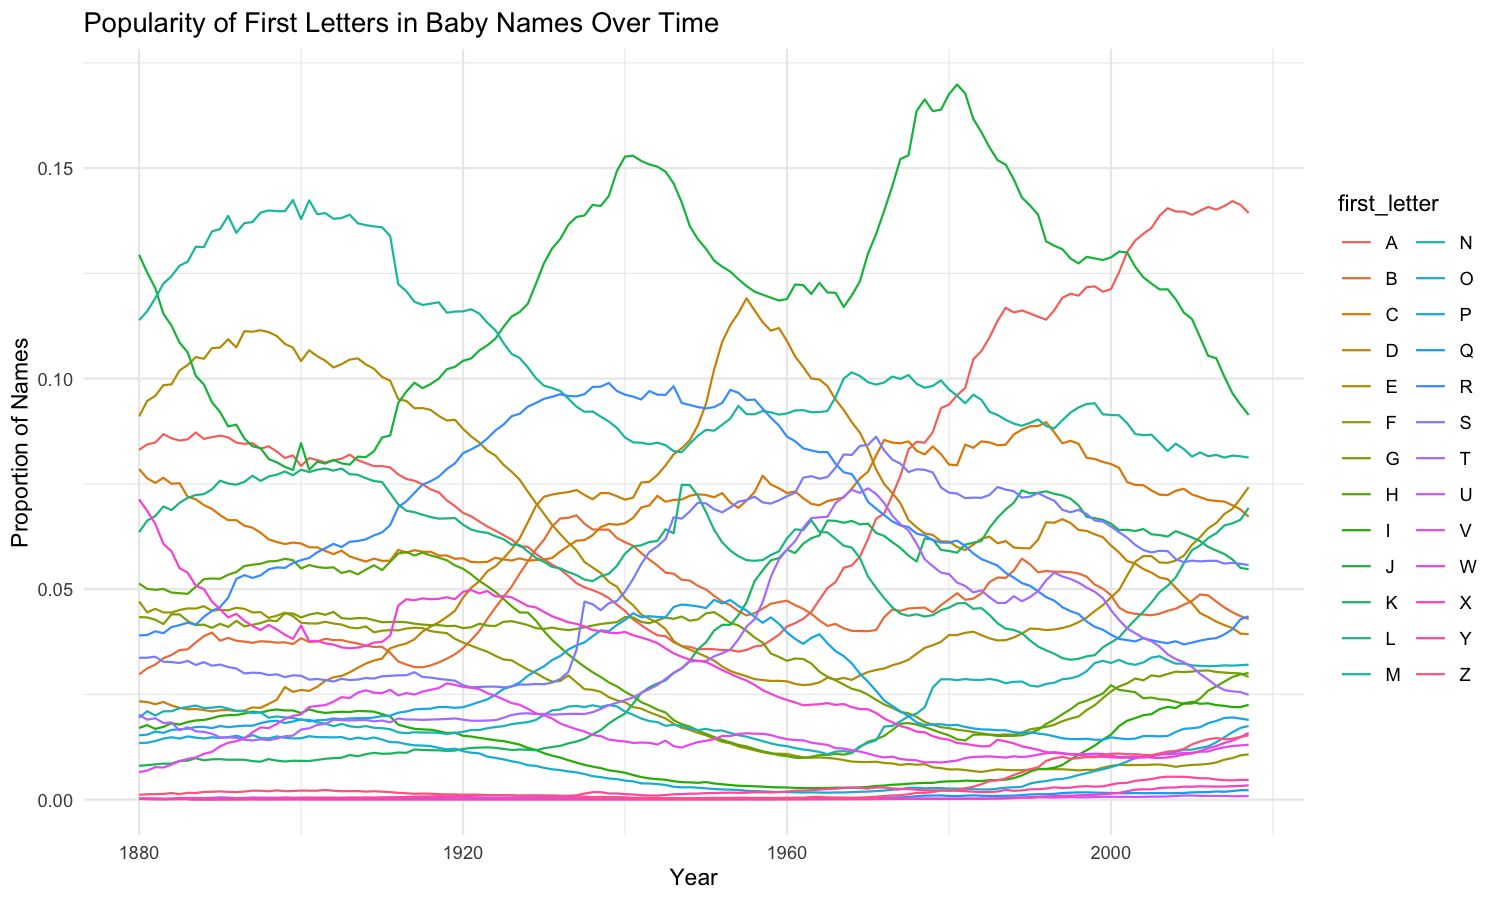

In [8]:
ggplot(letter_trends, aes(x = year, y = prop, color = first_letter)) +
  geom_line() +
  labs(title = "Popularity of First Letters in Baby Names Over Time",
       x = "Year", y = "Proportion of Names") +
  theme_minimal()

I find this plot hard to interpret (too busy). Perhaps a table would work better. Let's look at the most common first letter by decade:

In [9]:
# most common first letter by decade 
babynames %>%
  mutate(
    first_letter = str_sub(name, 1, 1),
    decade_start = floor(year / 10) * 10,
    decade_label = paste0(decade_start, "–", decade_start + 9)
  ) %>%
  group_by(decade_label, first_letter) %>%
  summarize(total = sum(n), .groups = "drop") %>%
  group_by(decade_label) %>%
  slice_max(order_by = total, n = 1, with_ties = FALSE) %>%
  arrange(decade_label)

decade_label,first_letter,total
<chr>,<chr>,<dbl>
1880–1889,M,302499
1890–1899,M,465711
1900–1909,M,591938
1910–1919,M,1768309
1920–1929,J,2562931
1930–1939,J,2930203
1940–1949,J,4277133
1950–1959,J,4862016
1960–1969,J,4531308


## Naming diversity
Has the variety of names increased over time? How can we measure this?

- Number of unique names/year
- Entropy
- Inequality measure (Gini coefficient)

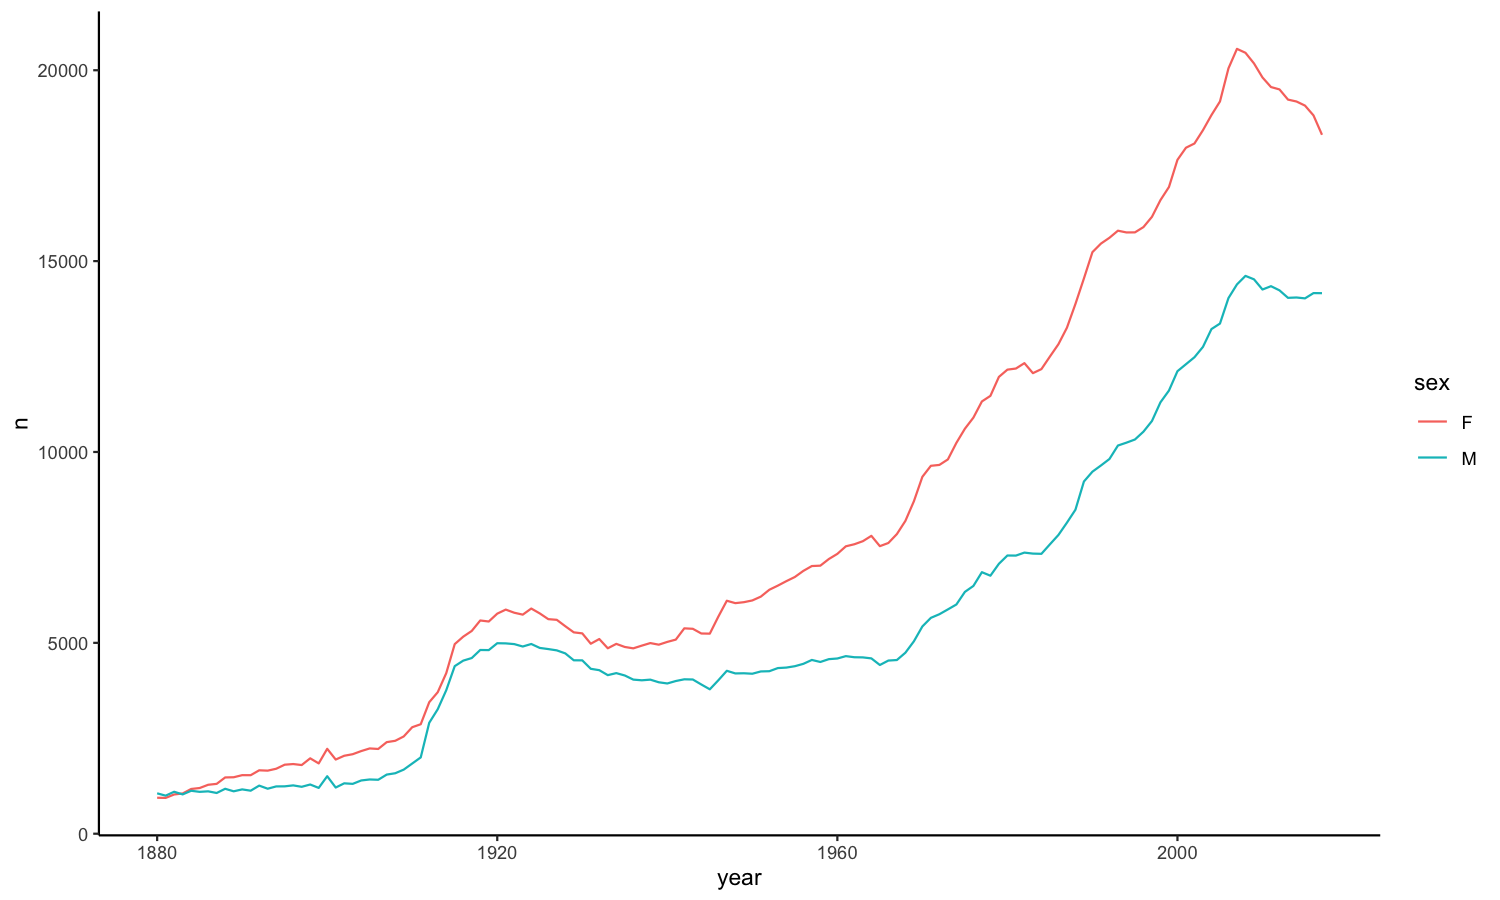

In [10]:
# unique names each year
babynames %>% count(year, sex) %>% ggplot + geom_line(aes(x = year, y = n, color = sex))

## Entropy
The entropy of a discrete probability distribution is:

$$H = -\sum_i p_i \log p_i$$

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


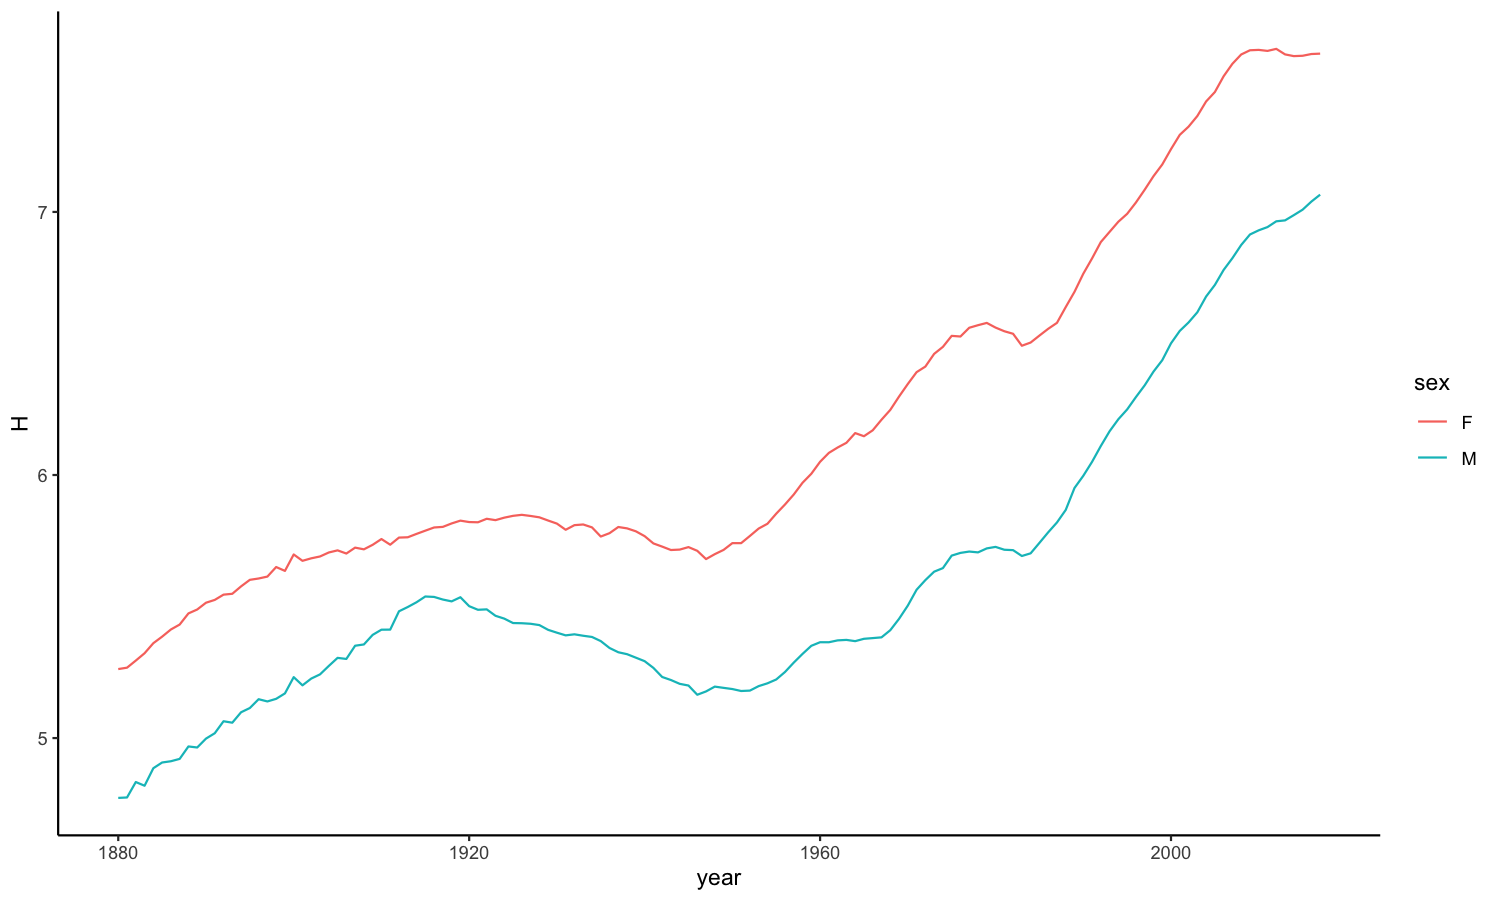

In [11]:
# entropy over time

babynames %>% group_by(year, sex) %>% 
    mutate(my_p = n / sum(n)) %>% 
    summarize(H = -sum(my_p * log(my_p))) %>% 
    ggplot + geom_line(aes(x = year, y = H, color = sex))

## Gini's coefficient

Gini's coefficient is another measure of inequality in a distribution. It is defined as:

$$G = \frac{\sum_{i,j} |x_i - x_j|}{2 \bar{x} n^2}$$



Assuming $x_i\ge 0$:

- $G=0$: perfect equality.
- $G=1$: "perfect inequality": one person has everything, everyone else has nothing.
- $G \ge 0$: obvious.
- $G \le 1$: obvious?

In [12]:
gini <- function(xs) {
    n <- length(xs)
    D <- dist(xs, diag=T, upper=T) %>% as.matrix
    mean(D) / 2 / mean(xs)
}

gini(c(1,1,123))

[1] 0.6506667

In [13]:
#install.packages('dineq')
library(dineq)
gini.wtd(c(10000000000,1,1,1,1,1))

[1] 0.8333333

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


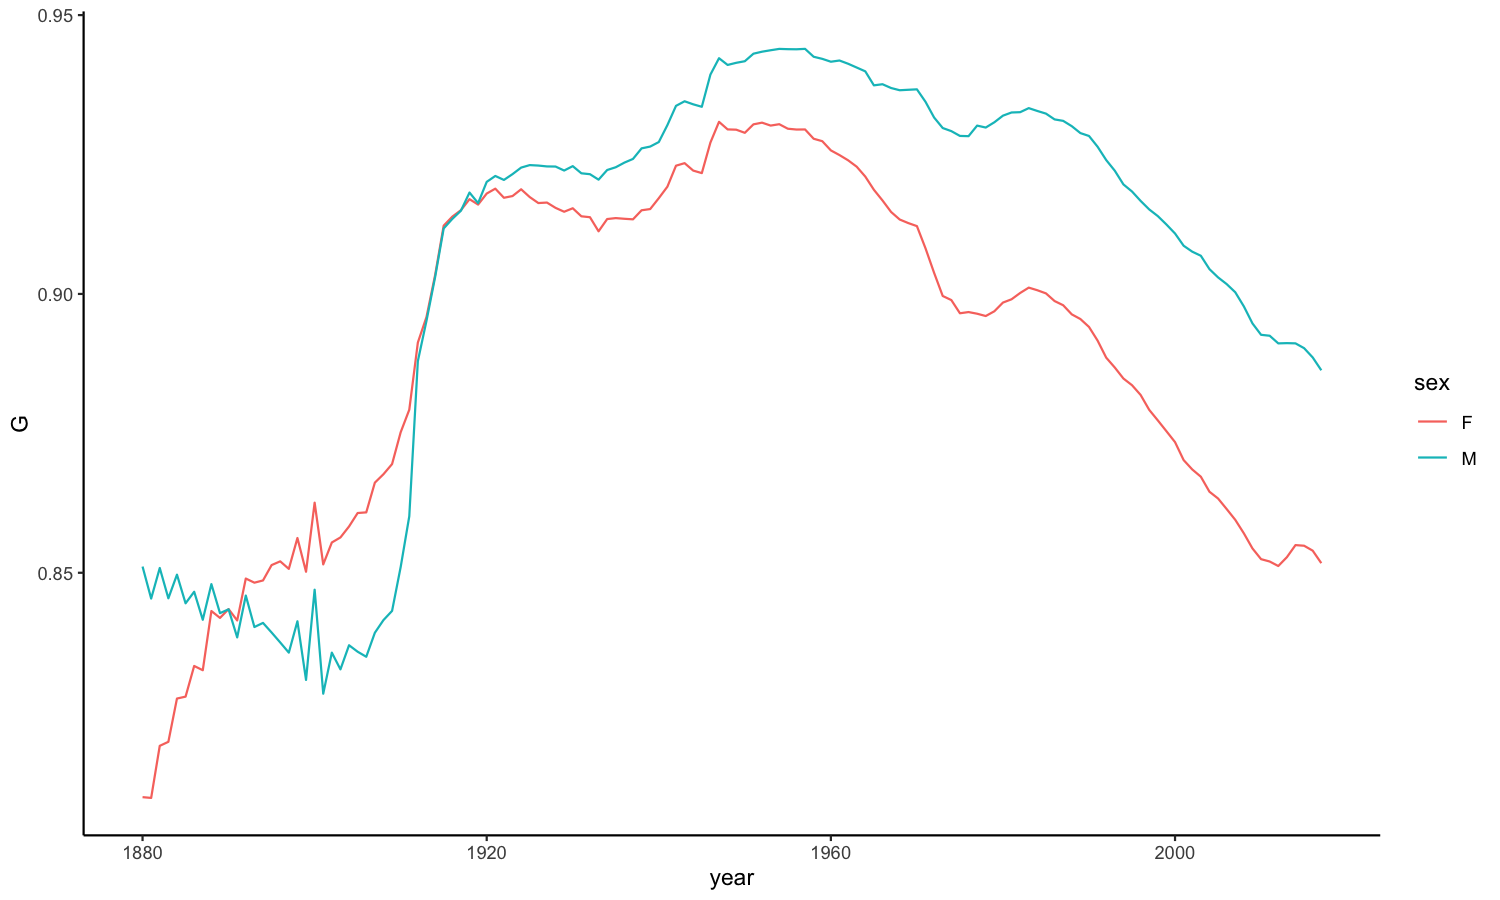

In [14]:
# gini index over time

babynames %>% group_by(year, sex) %>% summarize(G = gini.wtd(n)) %>% 
    ggplot + geom_line(aes(x = year, y = G, color = sex))

The Gini index for both male and female names declines over time, indicating that name choices have become more diverse.

Historically, baby names were concentrated around a small set of traditional names (high Gini), but in recent decades, naming has become less concentrated, with a wider variety of names being used (lower Gini).

Female names generally show a lower Gini index than male names, reflecting greater diversity and faster changing trends in naming preferences for girls.


## Age vs. name
Can you accurately predict someone's age based on their name and sex at birth? How should we approach this question?

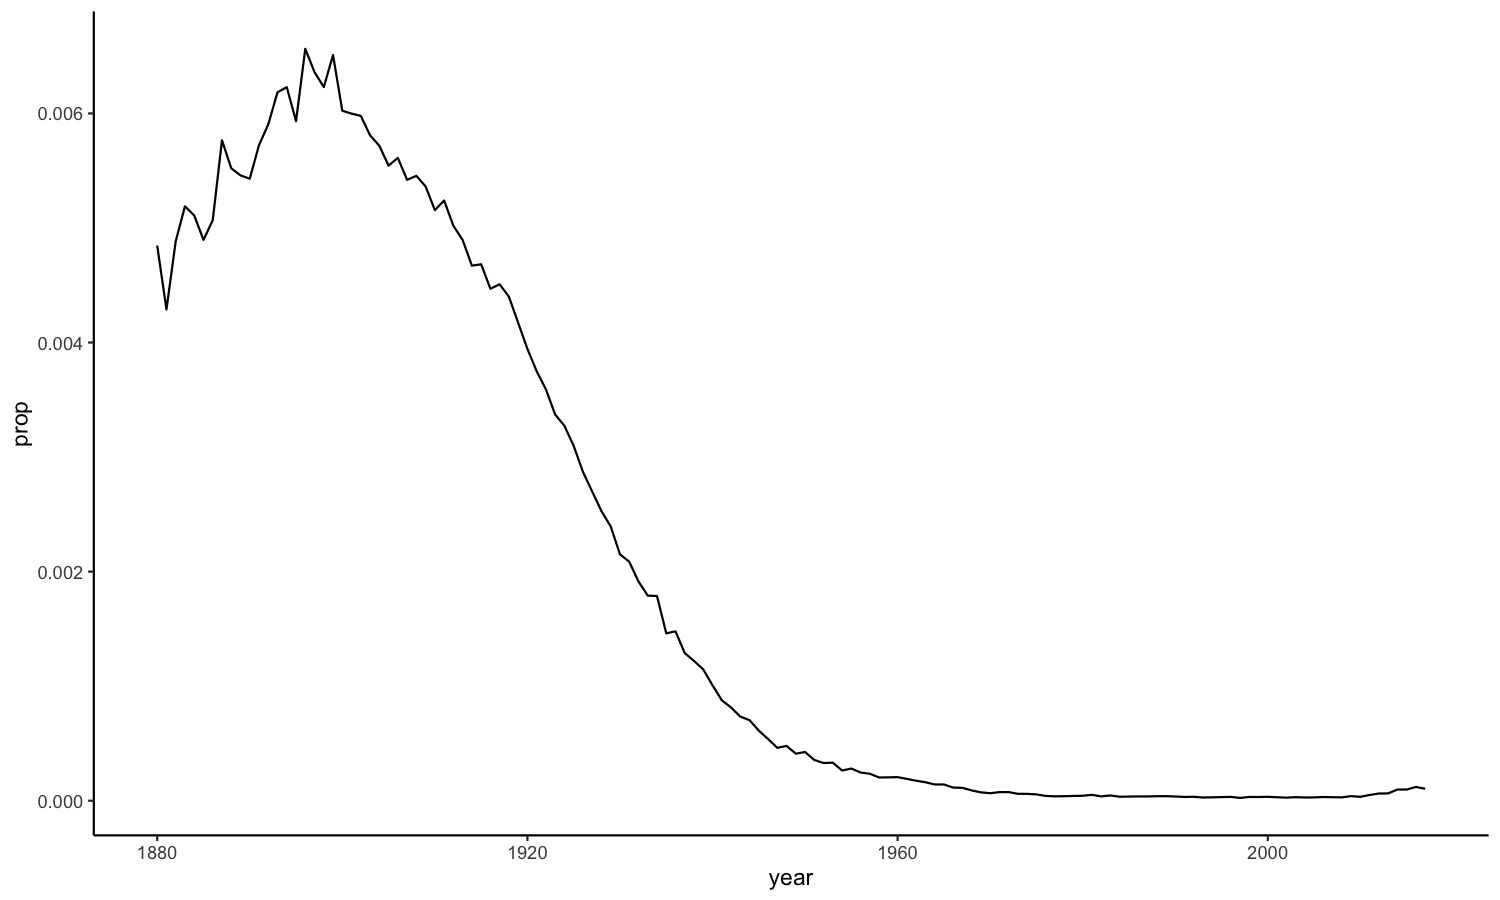

In [15]:
# female babies named agnes

babynames %>% filter(sex == "F", name == "Agnes") %>% 
    ggplot + geom_line(aes(x = year, y = prop))

## Modeling
When predicting someone's age based on name, we have to take into account two factors:

- When were the most babies born with that name?
- What is the likelihood that a person born in that year is still alive today?

This naturally leads to an application of Bayes rule.

## Bayesian model




\begin{gather}
\mathbb{P}(\text{age}=a\mid\text{name})=\mathbb{P}(\text{birth year}=2024-a\mid\text{name})
\\=\mathbb{P}(\text{name}\mid\text{birth year}=2024-a)\frac{\mathbb{P}(\text{birth year}=2024-a)}{\mathbb{P}(\text{name})} \\
\propto  \mathbb{P}(\text{name}\mid\text{birth year}=2024-a)\mathbb{P}(\text{birth year}=2024-a)
\end{gather}

What are the quantities we would need to estimate?

- $\mathbb{P}(\text{age}=a\mid\text{name})=\mathbb{P}(\text{birth year}=2024-a\mid\text{name})$:  ✅ 
- $\mathbb{P}(\text{birth year}=2024-a)$: the age distribution of the current population.

## Age distribution of the current population
- The US Census has this information [readily available](https://www.census.gov/popclock/data_tables.php?component=pyramid). 
- (I downloaded the table by hand since their website makes it hard to automate.)

In [17]:
read_csv('United States Population by Age and Sex.csv', skip=1) %>% 
    mutate(across(1:3, \(x) str_replace_all(x, "[^\\d.]", "") %>% as.numeric)) %>% 
    slice(1:101) -> ages

ages %>% print

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 307 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Age, Male % of Population, Female % of Population

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 101 × 3
     Age `Male % of Population` `Female % of Population`
   <dbl>                  <dbl>                    <dbl>
 1     0                   0.56                     0.54
 2     1                   0.55                     0.53
 3     2                   0.57                     0.54
 4     3                   0.57                     0.55
 5     4                   0.59                     0.56
 6     5                   0.6                      0.57
 7     6                   0.61                     0.59
 8     7                   0.62                     0.59
 9     8                   0.62                     0.59
10     9                   0.62                     0.59
# ℹ 91 more rows


In [129]:
ages %>% tail
#     pivot_longer(cols=2:3, values_to = "Percent of population") %>%
#     ggplot(aes(x=Age, y=`Percent of population`, color=name)) +
#     geom_line()

Age,Male % of Population,Female % of Population
<dbl>,<dbl>,<dbl>
95,0.02,0.04
96,0.01,0.03
97,0.01,0.02
98,0.01,0.02
99,0.00,0.01
100,0.01,0.02


## Putting it together

In [18]:
babynames %>% filter(name == "Jonathan", sex == "M") %>% 
    mutate(Age = 2023 - year) %>% 
    left_join(ages, by = join_by(Age)) %>% print

# A tibble: 138 × 8
    year sex   name         n      prop   Age `Male % of Population`
   <dbl> <chr> <chr>    <dbl>     <dbl> <dbl>                  <dbl>
 1  1880 M     Jonathan    18 0.000152    143                     NA
 2  1881 M     Jonathan    21 0.000194    142                     NA
 3  1882 M     Jonathan    27 0.000221    141                     NA
 4  1883 M     Jonathan    17 0.000151    140                     NA
 5  1884 M     Jonathan    21 0.000171    139                     NA
 6  1885 M     Jonathan    30 0.000259    138                     NA
 7  1886 M     Jonathan    19 0.000160    137                     NA
 8  1887 M     Jonathan    10 0.0000915   136                     NA
 9  1888 M     Jonathan    17 0.000131    135                     NA
10  1889 M     Jonathan    12 0.000101    134                     NA
# ℹ 128 more rows
# ℹ 1 more variable: `Female % of Population` <dbl>


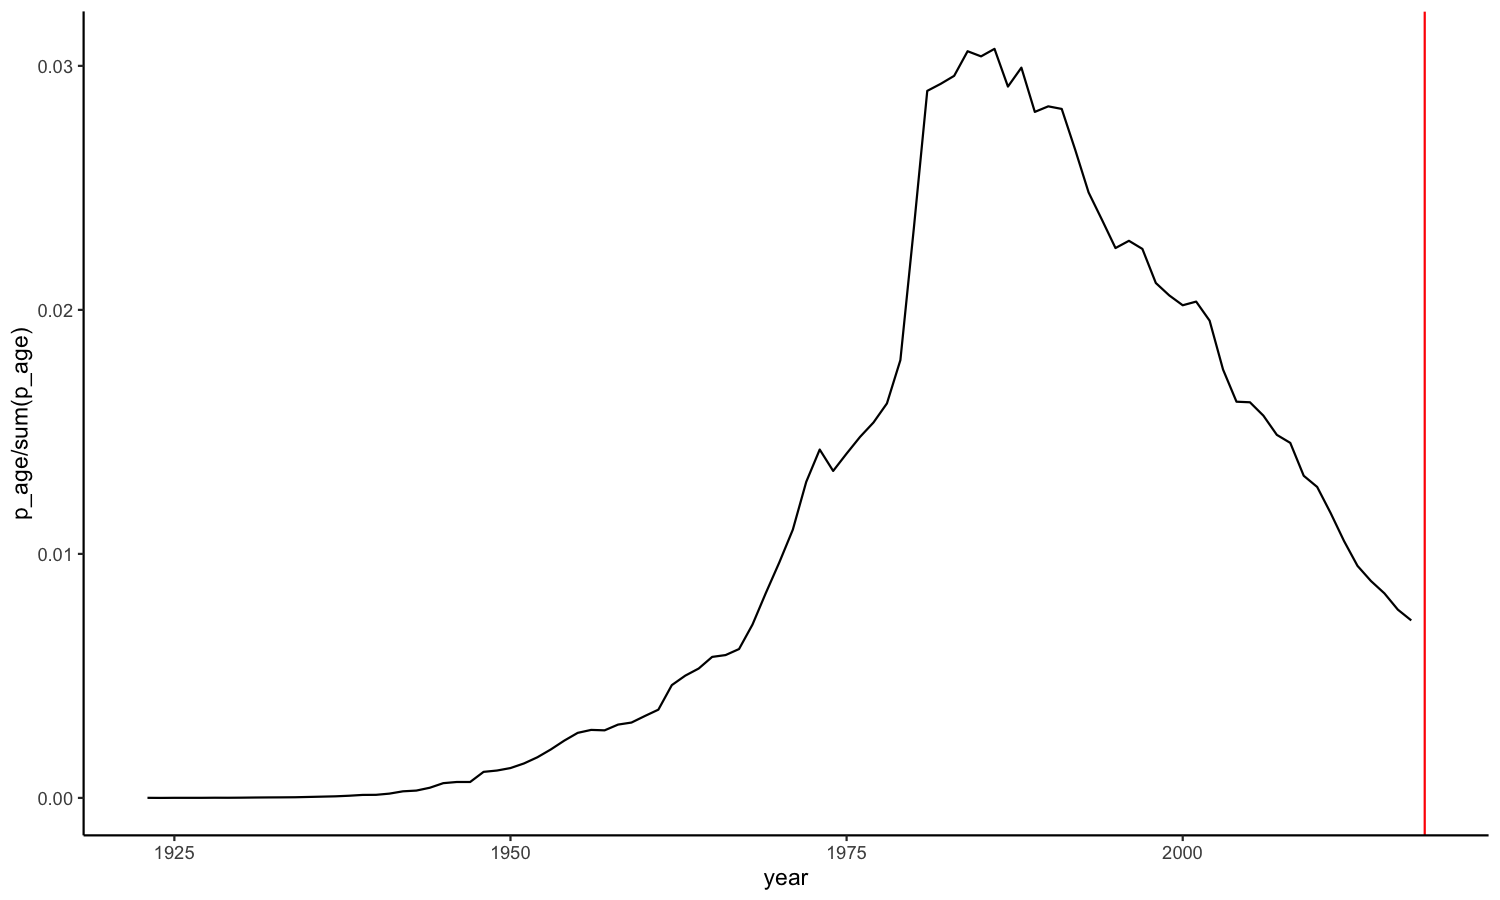

In [19]:
babynames %>% filter(name == "Jonathan", sex == "M") %>% 
    mutate(Age = 2023 - year) %>% 
    left_join(ages, by = join_by(Age)) %>% 
    mutate(p_age = prop * `Male % of Population`) %>% 
    filter(!is.na(p_age)) %>% 
    ggplot() + geom_line(aes(x = year, y = p_age / sum(p_age))) +
    geom_vline(xintercept = 2018, color = "red")

## Other options
- Supervised learning: build a prediction function $f(\text{name}) \to \text{age}$.
- Two important questions:
    - What sort of data would be needed?
    - What sort of prediction function $f$?


## Class Exercise

- Information-rich and Information-poor Names: Identify which names provide the most and least information about a person's age. What characteristics make a name more informative?
- Impact of Celebrities and Public Figures: Assess the influence of popular figures on naming trends. Do certain names become age-predictive following the rise of a celebrity?
- Machine Learning Model Comparison: Explore different models and methods for age prediction. Which models offer the best accuracy and reliability?


In [15]:
# Information rich vs poor names
# Fit a linear regression for prediction

# Create a linear regression model to predict year from name and sex
# model <- lm(year ~ name + sex, data = babynames)

# uh oh, we are in trouble -- not enough memory, cant fit the model, the number of variables are too large. 

In [4]:
# Information rich vs poor names

# Get top 100 male names by total count
top_male_names <- babynames %>%
  filter(sex == "M") %>%
  group_by(name) %>%
  summarise(total_count = sum(n)) %>%
  arrange(desc(total_count)) %>%
  slice_head(n = 100)

# Get top 100 female names by total count
top_female_names <- babynames %>%
  filter(sex == "F") %>%
  group_by(name) %>%
  summarise(total_count = sum(n)) %>%
  arrange(desc(total_count)) %>%
  slice_head(n = 100)

# Combine and filter the dataset to include only top names
top_names <- bind_rows(top_male_names, top_female_names)

babynames_top <- babynames %>%
  semi_join(top_names, by = "name") %>% print

# Fit the linear model on the reduced dataset
model <- lm(year ~ name + sex, data = babynames_top)

# A tibble: 43,494 × 5
    year sex   name          n   prop
   <dbl> <chr> <chr>     <int>  <dbl>
 1  1880 F     Mary       7065 0.0724
 2  1880 F     Anna       2604 0.0267
 3  1880 F     Emma       2003 0.0205
 4  1880 F     Elizabeth  1939 0.0199
 5  1880 F     Margaret   1578 0.0162
 6  1880 F     Alice      1414 0.0145
 7  1880 F     Sarah      1288 0.0132
 8  1880 F     Annie      1258 0.0129
 9  1880 F     Martha     1040 0.0107
10  1880 F     Laura      1012 0.0104
# ℹ 43,484 more rows


In [18]:
model


Call:
lm(formula = year ~ name + sex, data = babynames_top)

Coefficients:
    (Intercept)      nameAbigail         nameAdam         nameAlan  
     1958.97515          0.98051          2.06233          1.19082  
     nameAlbert    nameAlexander        nameAlice       nameAmanda  
      -12.93806         -0.69469        -14.98136         -0.93896  
      nameAmber          nameAmy       nameAndrea       nameAndrew  
        0.38871         -0.87139         -1.47636         -3.27080  
     nameAngela          nameAnn         nameAnna        nameAnnie  
       -2.91809        -10.16564         -9.37925        -17.49539  
    nameAnthony       nameArthur       nameAshley       nameAustin  
       -2.91715        -13.76810          2.10733          1.51894  
    nameBarbara     nameBenjamin        nameBetty      nameBeverly  
       -7.54717         -1.38777        -11.06154        -11.47926  
      nameBilly      nameBrandon       nameBrenda        nameBrian  
       -5.39327         15.

In [5]:
# Predict and calculate residuals
babynames_top <- babynames_top %>%
  mutate(predicted_year = predict(model, newdata = babynames_top),
         residual = abs(year - predicted_year))

# Identify information-rich and information-poor names
top_informative <- babynames_top %>%
  group_by(name) %>%
  summarise(mean_residual = mean(residual)) %>%
  arrange(mean_residual) %>%
  slice_head(n = 10)

bottom_informative <- babynames_top %>%
  group_by(name) %>%
  summarise(mean_residual = mean(residual)) %>%
  arrange(desc(mean_residual)) %>%
  slice_head(n = 10)

# View results
top_informative
bottom_informative

name,mean_residual
<chr>,<dbl>
Brittany,11.55093
Dylan,14.73440
Danielle,17.91428
Nicole,17.91514
Kimberly,19.64252
Sean,20.56313
Megan,20.59776
Heather,20.62905
Jeremy,21.47801


name,mean_residual
<chr>,<dbl>
Hannah,36.59900
Abigail,36.57009
Olivia,35.40080
Emma,35.24529
Madison,35.20003
Austin,35.16614
Grace,35.05411
Samantha,35.01994
Noah,34.92564


## Impact of Celebrities and Public Figures

- Example 1: Kobe (inspired by Kobe Bryant)
- Example 2: Khaleesi (Game of Thrones character)

Kobe Bryant was drafted to the NBA in 1996.
The name “Kobe” had almost no usage before the mid-1990s.
it spiked sharply after 1996, peaking in the early 2000s.
As a result, the name “Kobe” is highly age-predictive — likely born between 1996–2010.

The name “Khaleesi” was invented by the HBO show Game of Thrones (first aired in 2011).
Appeared only after 2011, peaking around 2014–2016.
This name is extremely predictive of birth year: no one named Khaleesi was born before 2011.



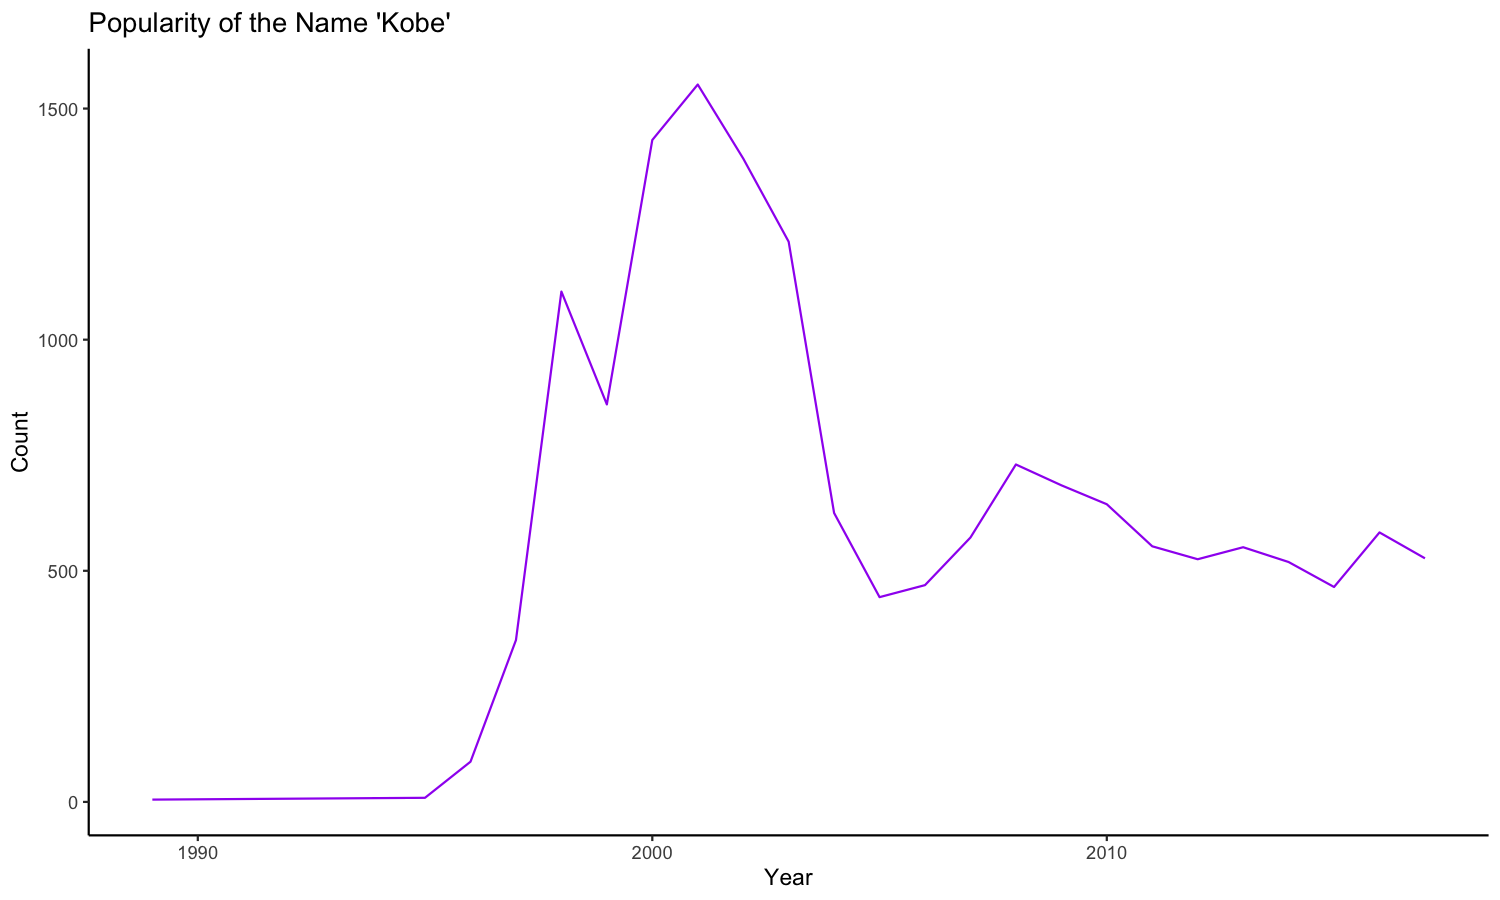

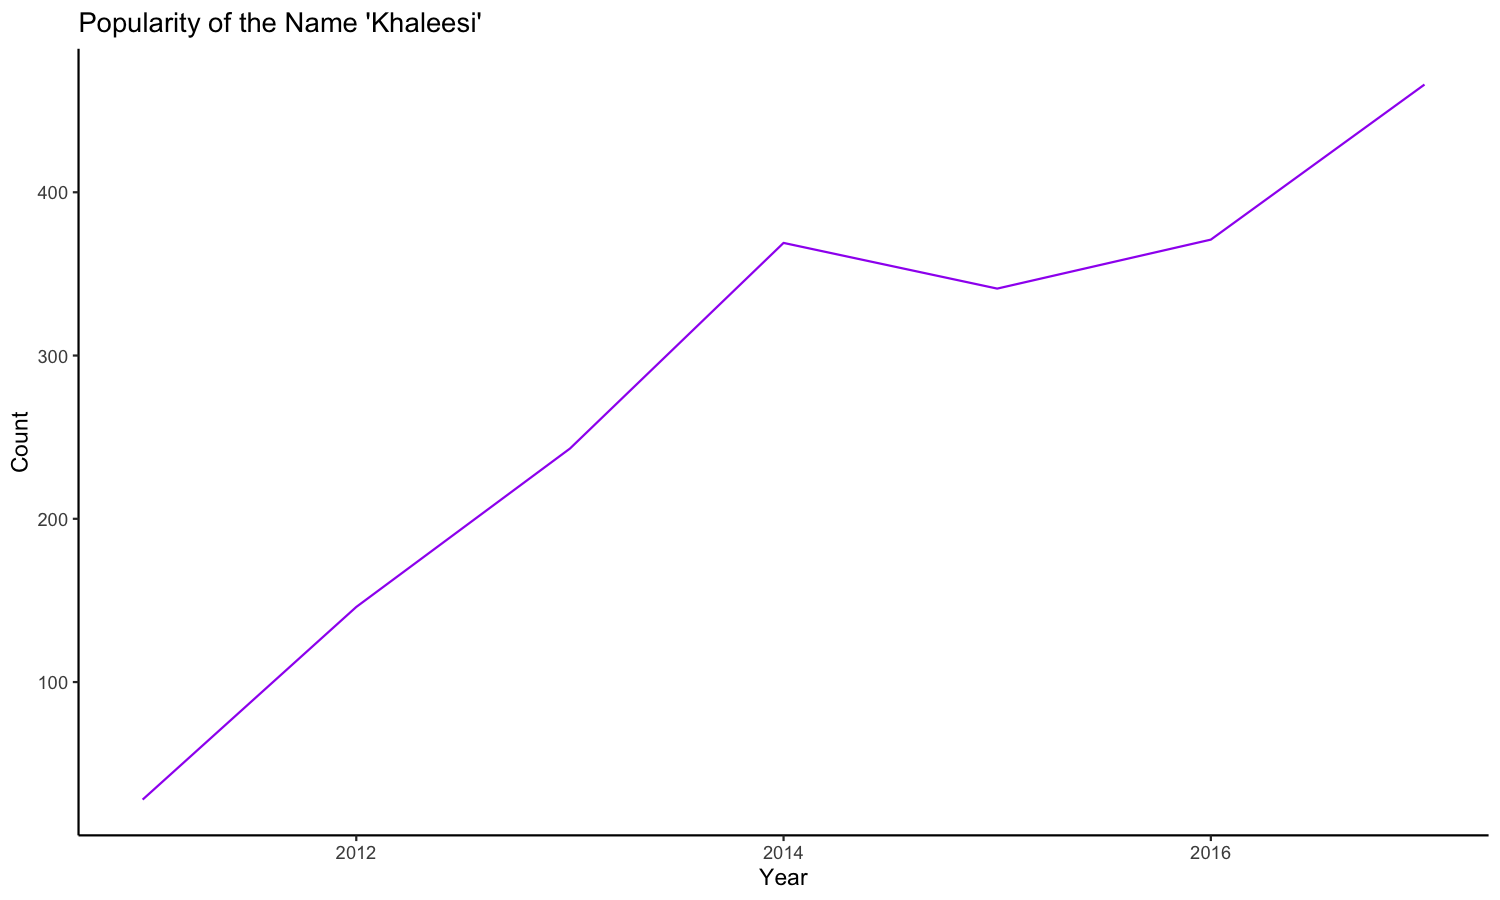

In [21]:
babynames %>%
  filter(name == "Kobe", sex == "M") %>%
  ggplot(aes(x = year, y = n)) +
  geom_line(color = "purple") +
  labs(title = "Popularity of the Name 'Kobe'", y = "Count", x = "Year")

babynames %>%
  filter(name == "Khaleesi", sex == "F") %>%
  ggplot(aes(x = year, y = n)) +
  geom_line(color = "purple") +
  labs(title = "Popularity of the Name 'Khaleesi'", y = "Count", x = "Year")


In [6]:
# Filter for the two names of interest
celebrity_names <- babynames %>%
  filter(name %in% c("Kobe", "Khaleesi"))

# Prepare dataset: restrict to just Kobe and Khaleesi
celeb_data <- celebrity_names %>%
  mutate(sex_binary = ifelse(sex == "M", 1, 0)) %>%
  select(year, name, sex_binary)

# Fit linear model
model <- lm(year ~ name + sex_binary, data = celeb_data)

# Predict and calculate residuals
celeb_data <- celeb_data %>%
  mutate(predicted_year = predict(model, newdata = celeb_data),
         residual = abs(predicted_year - year))

# Mean residual by name
residual_summary <- celeb_data %>%
  group_by(name) %>%
  summarise(mean_residual = mean(residual))

residual_summary


name,mean_residual
<chr>,<dbl>
Khaleesi,1.714286
Kobe,5.755556


In [2]:
install.packages("caret")

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’





The downloaded binary packages are in
	/var/folders/ng/qcb7p5f14nl6kwpxnh6rz73h0000gn/T//Rtmpqa6wZy/downloaded_packages


In [6]:
# Load libraries
library(caret)
library(glmnet)
library(randomForest)
library(xgboost)

# Filter data (1980+)
babynames_filtered <- babynames %>%
  filter(year >= 1980)

# Top 100 male + 100 female names
top_female <- babynames_filtered %>%
  filter(sex == "F") %>%
  group_by(name) %>%
  summarise(total = sum(n)) %>%
  slice_max(order_by = total, n = 100)

top_male <- babynames_filtered %>%
  filter(sex == "M") %>%
  group_by(name) %>%
  summarise(total = sum(n)) %>%
  slice_max(order_by = total, n = 100)

top_names <- bind_rows(top_female, top_male)

# Filter to top 200 names
data <- babynames_filtered %>%
  semi_join(top_names, by = "name") %>%
  mutate(
    sex_binary = ifelse(sex == "M", 1, 0),
    name = factor(name)
  ) %>%
  select(name, sex_binary, year)

# One-hot encode names
dummy <- dummyVars(year ~ ., data = data)
X <- predict(dummy, newdata = data)
y <- data$year

# Train/test split
set.seed(123)
train_index <- createDataPartition(y, p = 0.8, list = FALSE)
X_train <- X[train_index, ]
y_train <- y[train_index]
X_test <- X[-train_index, ]
y_test <- y[-train_index]

# Convert to matrices
X_train_mat <- as.matrix(X_train)
X_test_mat <- as.matrix(X_test)

# 1. Linear Regression
lm_model <- lm(y_train ~ ., data = as.data.frame(X_train))
lm_preds <- predict(lm_model, newdata = as.data.frame(X_test))
lm_rmse <- RMSE(lm_preds, y_test)

# 2. Ridge Regression
ridge_model <- cv.glmnet(X_train_mat, y_train, alpha = 0)
ridge_preds <- predict(ridge_model, s = "lambda.min", newx = X_test_mat)
ridge_rmse <- RMSE(ridge_preds, y_test)

# 3. Lasso Regression
lasso_model <- cv.glmnet(X_train_mat, y_train, alpha = 1)
lasso_preds <- predict(lasso_model, s = "lambda.min", newx = X_test_mat)
lasso_rmse <- RMSE(lasso_preds, y_test)

# 4. Random Forest
rf_model <- randomForest(x = X_train, y = y_train, ntree = 100)
rf_preds <- predict(rf_model, newdata = X_test)
rf_rmse <- RMSE(rf_preds, y_test)

# 5. XGBoost
dtrain <- xgb.DMatrix(data = X_train_mat, label = y_train)
dtest <- xgb.DMatrix(data = X_test_mat, label = y_test)
xgb_model <- xgboost(data = dtrain, nrounds = 100, objective = "reg:squarederror", verbose = 0)
xgb_preds <- predict(xgb_model, newdata = dtest)
xgb_rmse <- RMSE(xgb_preds, y_test)

# Compare results
results <- tibble(
  Model = c("Linear Regression", "Ridge Regression", "Lasso Regression", "Random Forest", "XGBoost"),
  RMSE = c(lm_rmse, ridge_rmse, lasso_rmse, rf_rmse, xgb_rmse)
)

print(results %>% arrange(RMSE))

# A tibble: 5 × 2
  Model              RMSE
  <chr>             <dbl>
1 Ridge Regression   10.7
2 Lasso Regression   10.7
3 XGBoost            10.7
4 Linear Regression  10.8
5 Random Forest      10.9
